# Housing Price Prediction using Evolutionary Algorithm

Setting Up

In [1]:
import csv
import random
import numpy
import time
import math

# importing the dataset
with open('USA_Housing.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

# removing the top most row
data = data[1:]

# setting up data for computiing and training
res = []
for i in range(len(data)):
    res.append(data[i][-2])
    data[i] = data[i][:-1]
    data[i][-1] = 1

In [2]:
def vector_product(T,I):
    x = 0
    for i in range(len(T)):
        x += float(I[i])*float(T[i])
    return x

In [ ]:
def difference_error(x,R):
    p = 0
    for i in range(len(x)):
        p += abs(float(x[i])-float(R[i]))
    return p

In [4]:
def Fitness_Function(Labels, Args):
    aux = []
    for i in Args[0]:
        aux.append(vector_product(Labels,i))
    return difference_error(aux, Args[1])

Code for Differential Evolution Algorithm

In [5]:
class solution:
    def __init__(self):
        self.best = 0
        self.leader_solution = []
        self.convergence = []
        self.conv_gen = 0
        self.optimizer = ""
        self.objfname = ""
        self.startTime = 0
        self.endTime = 0
        self.executionTime = 0
        self.lb = 0
        self.ub = 0
        self.dim = 0
        self.popnum = 0
        self.maxiers = 0

def Diff_Evolution(objf, lb, ub, dim, PopSize, iters, args):

    mutation_factor = 0.5
    crossover_ratio = 0.7
    stopping_func = None

    if not isinstance(lb, list):
        lb = [lb for _ in range(dim)]
        ub = [ub for _ in range(dim)]

    s = solution()
    s.best = float("inf")
    population = []

    population_fitness = numpy.array([float("inf") for _ in range(PopSize)])

    for p in range(PopSize):
        sol = []
        for d in range(dim):
            d_val = random.uniform(lb[d], ub[d])
            sol.append(d_val)
        population.append(sol)
    population = numpy.array(population)

    for i in range(PopSize):
        fitness = objf(population[i, :], args)
        population_fitness[p] = fitness

        if fitness < s.best:
            s.best = fitness
            s.leader_solution = population[i, :]

    convergence_curve = numpy.zeros(iters)

    timerStart = time.time()
    s.startTime = time.strftime("%Y-%m-%d-%H-%M-%S")

    t = 0
    while t < iters:
        if stopping_func is not None and stopping_func(s.best, s.leader_solution, t):
            break

        for i in range(PopSize):

            ids_except_current = [_ for _ in range(PopSize) if _ != i]
            id_1, id_2, id_3 = random.sample(ids_except_current, 3)

            mutant_sol = []
            for d in range(dim):
                d_val = population[id_1, d] + mutation_factor * (population[id_2, d] - population[id_3, d])

                rn = random.uniform(0, 1)
                if rn > crossover_ratio:
                    d_val = population[i, d]

                mutant_sol.append(d_val)

            mutant_sol = numpy.clip(mutant_sol, lb, ub)

            mutant_fitness = objf(mutant_sol, args)

            if mutant_fitness < population_fitness[i]:
                population[i, :] = mutant_sol
                population_fitness[i] = mutant_fitness

                if mutant_fitness < s.best:
                    s.best = mutant_fitness
                    s.leader_solution = mutant_sol

        convergence_curve[t] = s.best
        if (t+1) % 100 == 0:
            print("Iteration",'{:>4}'.format(t+1),"Current Best :",round(s.best,5))

        t = t + 1

        timerEnd = time.time()
        s.endTime = time.strftime("%Y-%m-%d-%H-%M-%S")
        s.executionTime = timerEnd - timerStart
        s.convergence = convergence_curve
        s.optimizer = "DE"
        s.objfname = objf.__name__

    return s

Dataset to be passed to Diff_Evolution function

In [6]:
# training upon the first 200 records in the dataset
NumRecords = 201 

Obj_Function = Fitness_Function
Lower_Bound = -10e8
Upper_Bound = 10e8
Dimention = 6
Population = 100
Generations = 2000
Arguments = [data[:NumRecords], res[:NumRecords]]

Training using Differential Evolution

In [7]:
SOLUTION = Diff_Evolution(Obj_Function, Lower_Bound, Upper_Bound, Dimention, Population, Generations+1, Arguments)

Iteration  100 Current Best : 28960701579.12448
Iteration  200 Current Best : 2388989249.20478
Iteration  300 Current Best : 285098578.48314
Iteration  400 Current Best : 43400285.61327
Iteration  500 Current Best : 17037533.32713
Iteration  600 Current Best : 16166780.04929
Iteration  700 Current Best : 16154243.70069
Iteration  800 Current Best : 16153040.03864
Iteration  900 Current Best : 16152734.66429
Iteration 1000 Current Best : 16152621.76437
Iteration 1100 Current Best : 16152605.44058
Iteration 1200 Current Best : 16152602.65172
Iteration 1300 Current Best : 16152601.92528
Iteration 1400 Current Best : 16152601.86311
Iteration 1500 Current Best : 16152601.82793
Iteration 1600 Current Best : 16152601.8194
Iteration 1700 Current Best : 16152601.81823
Iteration 1800 Current Best : 16152601.81791
Iteration 1900 Current Best : 16152601.81786
Iteration 2000 Current Best : 16152601.81784


In [8]:
print('Best Fitness :', round(SOLUTION.best,5))
print('\nCoefficients :', list(SOLUTION.leader_solution), sep="\n")

Best Fitness : 16152601.81784

Coefficients :
[20.816560152007334, 165262.20790006878, 133934.863510844, -6302.098828618624, 13.906448132099431, -2589362.8083276236]


Convergence Curve

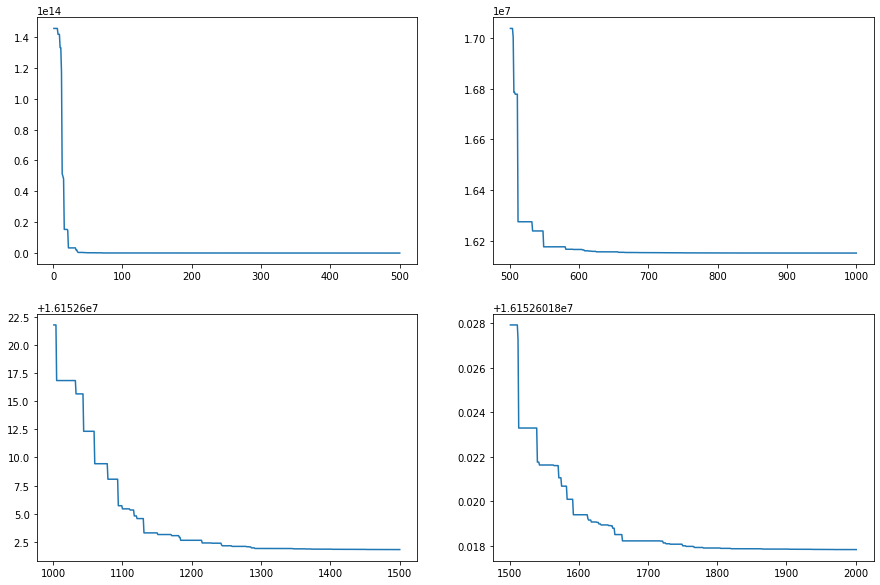

In [9]:
import matplotlib.pyplot as plt

x_axis = range(1, len(SOLUTION.convergence)+1)

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.subplot(2, 2, 1)
plt.plot(x_axis[:int(len(x_axis)/4)], SOLUTION.convergence[:int(len(x_axis)/4)])
plt.subplot(2, 2, 2)
plt.plot(x_axis[int(len(x_axis)/4):int(len(x_axis)/2)], SOLUTION.convergence[int(len(x_axis)/4):int(len(x_axis)/2)])
plt.subplot(2, 2, 3)
plt.plot(x_axis[int(len(x_axis)/2):int(3*len(x_axis)/4)], SOLUTION.convergence[int(len(x_axis)/2):int(3*len(x_axis)/4)])
plt.subplot(2, 2, 4)
plt.plot(x_axis[int(3*len(x_axis)/4):], SOLUTION.convergence[int(3*len(x_axis)/4):])

plt.show()

Calculating **Mean Absolute Percentage Training Error**

In [10]:
aux = []
for i in data[:NumRecords]:
    aux.append(vector_product(SOLUTION.leader_solution,i))

optSum = 0
for a in range(NumRecords):
    optSum += abs(aux[a]-float(res[a]))/float(res[a])

print("Mean Absolute Percentage Training Error :", round(optSum*100/len(aux),4), "%")

Mean Absolute Percentage Training Error : 7.886 %


**Validation**

In [11]:
Validation_Records = 50

In [12]:
argV = [data[NumRecords:NumRecords+Validation_Records], res[NumRecords:NumRecords+Validation_Records]]
prediction = Fitness_Function(SOLUTION.leader_solution, argV)

Calculation **Mean Absolute Percentage Validation Error**

In [13]:
aux = []
for i in data[NumRecords:NumRecords+Validation_Records]:
    aux.append(vector_product(SOLUTION.leader_solution,i))

optSum = 0
for a in range(len(aux)):
    optSum += abs(aux[a]-float(res[NumRecords+a]))/float(res[NumRecords+a])

print("Mean Absolute Percentage Validation Error :", round(optSum*100/len(aux),4), "%")

Mean Absolute Percentage Validation Error : 7.9192 %
